## 操作系统笔记
### 1.hello.c运行报错分析
hello.c是一段及其短小代码：

In [ ]:
int main()
{
}

编译过程如下：

```
gcc -c hello.c  
ld hello.o -e main  
```    
最终生成了a.out可执行文件。执行./a.out,得到下面错误:  

```  
Segmentation fault (core dumped)  
```  

为了分析错误发生在哪里，通过对a.out反编译生成汇编指令，并采用gdb调试的方式判断问题出在哪里。  
gdb调试命令:  
- starti //断点进入程序起始处  
- stepi //单步指令调试程序  
- layout asm //查看程序汇编指令  
- info registers //查看寄存器的值   

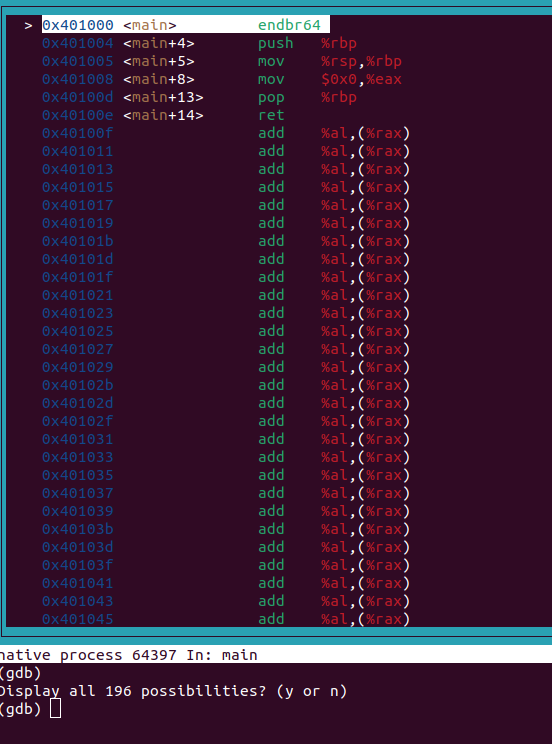

``` nasm
401000:	f3 0f 1e fa          	endbr64   
401004:	55                   	push   %rbp  //%rbp寄存器的值入栈  
401005:	48 89 e5             	mov    %rsp,%rbp  //将%rsp的值赋值给%rbp  
401008:	b8 00 00 00 00       	mov    $0x0,%eax  //%eax寄存器赋值为0  
40100d:	5d                   	pop    %rbp  //将栈值pop并赋值给%rbp  
40100e:	c3                   	ret   
``` 

starti进入程序时，%rbp寄存器的值为0，%rsp寄存器指向的地址8位数值为1，通过push以及pop指令，%rsp寄存器指向了初始位置，及8字节值为1. ret指令做如下两个操作：  

> The RET instruction pops the return address of the stack (which is pointed to by the stack pointer register) and then continues execution at that address.  

> the RET instruction POPs the address from the top of the stack into the execution pointer, decrements the stack pointer, and resumes execution to the return address that it retrieved from the stack.  
    
ret指令会将栈指针寄存器(%rsp)的值放入%rip，%rip存放的是下一步要执行的指令地址。而这里%rsp指向的地址值为1，所以1就放入了%rip中，而1并不是可执行的代码区域，所以会报segment fault。  
